In [2]:
import numpy as np
from math import pi,sin,cos
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import handcalcs.render
import sympy as sym

### Second approximate Model of IM

In [3]:
# Machine parameters

#Dictionary - one of the data structures used in Python 
#Name of_dictionary = {'name of variable': value, "nameof2ndvariable": value2}
mach_mc = {"rs": 0.009, "rr": 0.007, "lh": 4.14, "ls": 4.21, "lr": 4.21, "tmech":509.6}

mach_mb = {"rs": 0.0185, "rr": 0.0132, "lh": 3.81, "ls": 3.9, "lr": 3.9, "tmech":397.31}

mach_ma = {"rs": 0.015, "rr": 0.04, "lh": 2.31, "ls": 2.35, "lr": 2.35, "tmech":596.9}

#mach_my = {"rs": 0.016, "rr": 0.05, "lh": 2.31, "ls": 2.35, "lr": 2.35, "tmech":596.9}

mach_BM = {"rs": 0.0426, "rr": 0.02113, "lh": 2.252, "ls": 2.252+0.078, "lr": 2.252+0.1052, "tmech":200.}

print(mach_mb["rs"])

#defining parmeters for a T-equivalent circuit
def mach_Tpara(dict):
    rs = dict["rs"]
    rr = dict["rr"]
    lh = dict["lh"]
    ls = dict["ls"]
    lr = dict["lr"]
    sig= 1-(lh*lh)/(lr*ls)
    kr=lh/lr
    sigs= ls- lh
    sigr = lr - lh
    lsigss = sigs*lh
    lsigrr = sigr*lh
#     print(ls)
    return rs,rr,lh,ls,lr,sig,lsigss,lsigrr

0.0185


In [6]:
def SSIMapprox2(mach_dict,vs,ws,s):
    rs,rr,lh,ls,lr,sig,lsigss,lsigrr = mach_Tpara(mach_dict)
    #Impedance on rotor 
    zr = complex(rr/s,(ws*(lsigss + lsigrr)))
    ir = complex(0,vs)/zr
    irmag = np.abs(ir)
    pag = irmag**2*rr/s
    me = pag/ws
    w = ws*(1-s)
    return me,w,irmag

In [42]:
svar = np.arange(-0.0001,1.0,0.01)
mes = np.zeros(len(svar))
irs = np.zeros(len(svar))
w_s = np.zeros(len(svar))

for ii,sn in enumerate(svar):
    yy = SSIMapprox2(mach_BM,1.0,1.0,sn)
    mes[ii] = yy[0]
    w_s[ii] = yy[1]
    irs[ii] = yy[2]

Text(0.5, 0, '$m_e$')

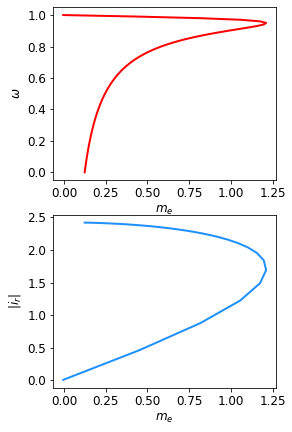

In [43]:
plt.figure(101, figsize = (4,7))
plt.rc('font', size = 12)
plt.subplot(2,1,1)
plt.plot(mes,w_s,'r',lw = 2, label = "speed-Torque")
# plt.ylim(0,1.1)
plt.ylabel('$\omega$')
plt.xlabel('$m_e$')
# plt.xlim(0)
plt.subplot(2,1,2)
plt.plot(mes,irs,'dodgerblue',lw = 2, label = "current-Torque")
plt.ylabel('$|i_r|$')
plt.xlabel('$m_e$')
